In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#for tuning the model
from sklearn.model_selection import GridSearchCV

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/Michael/Python Anaconda/Machine_Learning_SHU/Project/water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [7]:
df.isna().sum().sum()

1434

In [8]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
df.shape

(3276, 10)

In [10]:
df.Sulfate.fillna(df.Sulfate.median(), inplace=True)
df.Trihalomethanes.fillna(df.Trihalomethanes.median(), inplace=True)
df.ph.fillna(df.Trihalomethanes.median(), inplace=True)

ph
Skew : 1.94


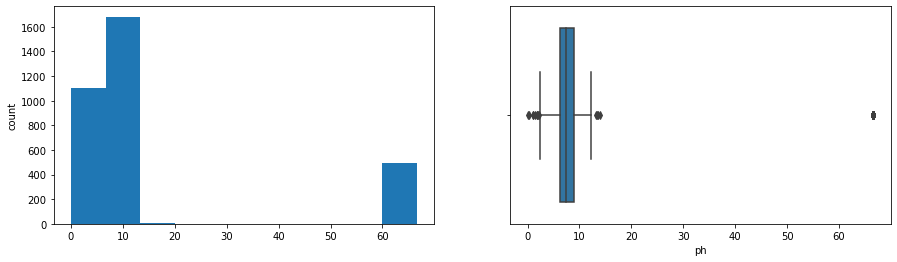

Hardness
Skew : -0.04


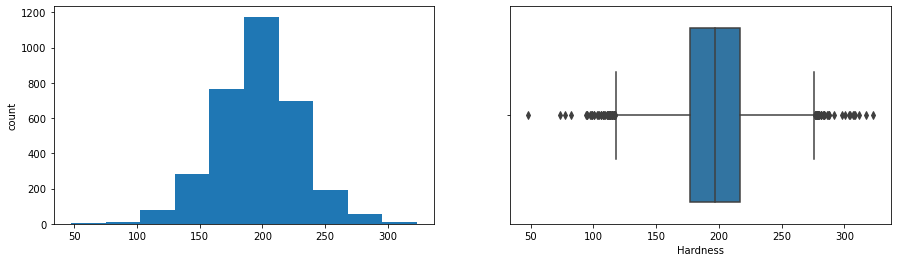

Solids
Skew : 0.62


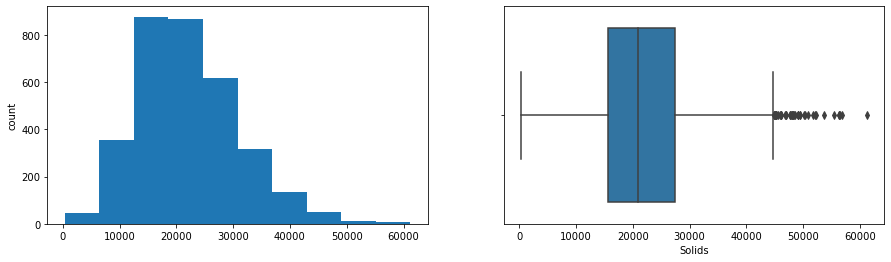

Chloramines
Skew : -0.01


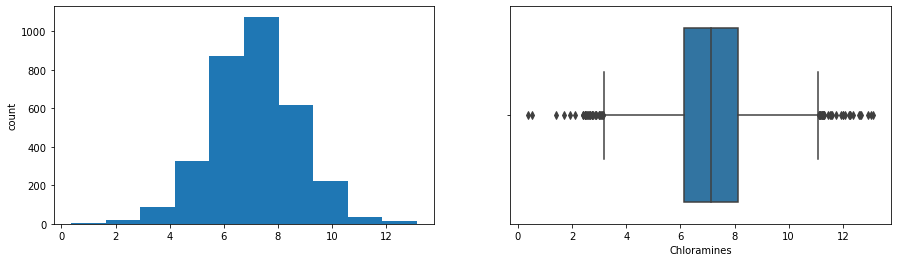

Sulfate
Skew : -0.03


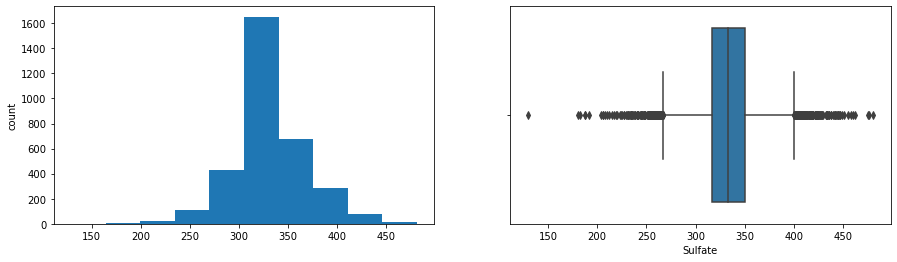

Conductivity
Skew : 0.26


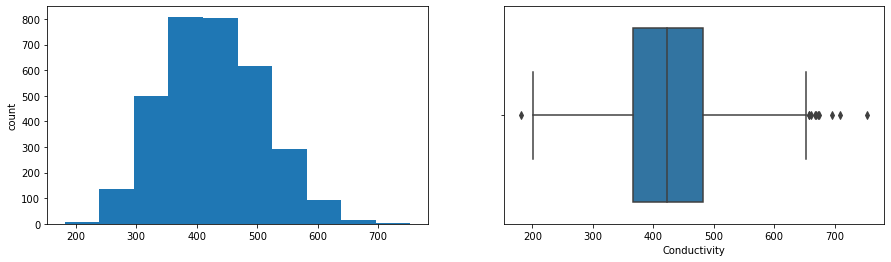

Organic_carbon
Skew : 0.03


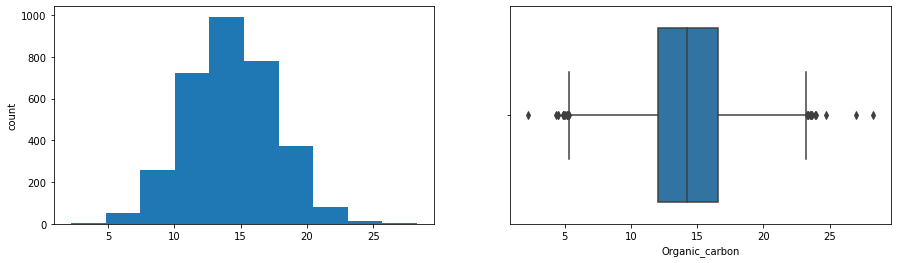

Trihalomethanes
Skew : -0.09


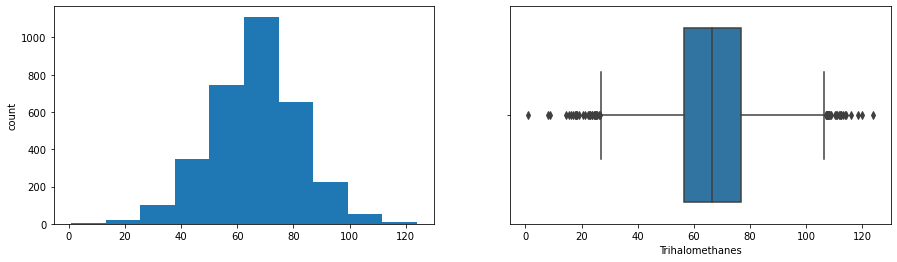

Turbidity
Skew : -0.01


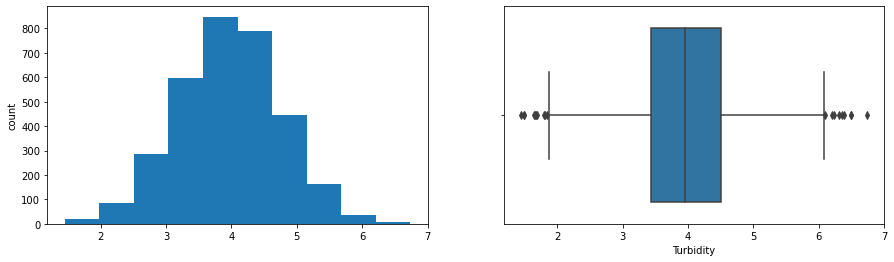

Potability
Skew : 0.45


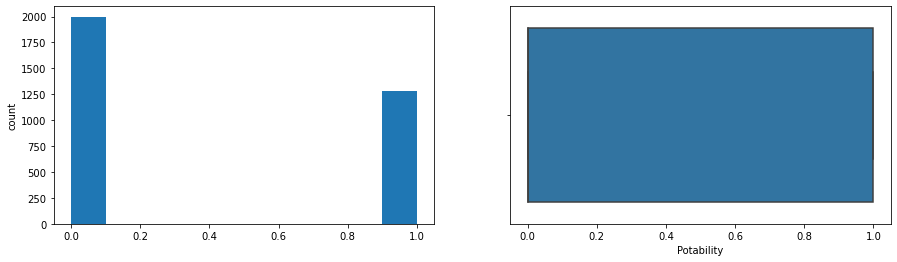

In [11]:
for col in df:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

In [12]:
print(df['Potability'].value_counts(normalize=True))

0    0.60989
1    0.39011
Name: Potability, dtype: float64


In [13]:
#Separating the target variable and other variables
Y= df.Potability
X= df.drop(['Potability'],axis=1)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [15]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attriate', 'Attriate'], yticklabels=['Not Attriate', 'Attriate'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [16]:
#building decision tree
dt = DecisionTreeClassifier(random_state=1)

In [17]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1398
           1       1.00      1.00      1.00       895

    accuracy                           1.00      2293
   macro avg       1.00      1.00      1.00      2293
weighted avg       1.00      1.00      1.00      2293



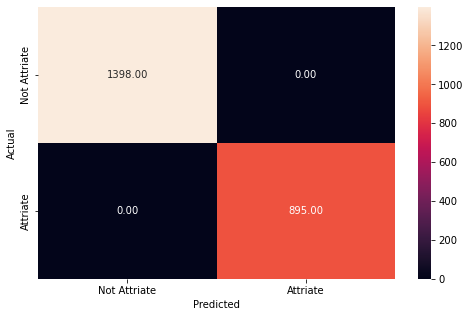

In [18]:
y_train_pred_dt=dt.predict(x_train)
metrics_score(y_train,y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       600
           1       0.48      0.46      0.47       383

    accuracy                           0.60       983
   macro avg       0.57      0.57      0.57       983
weighted avg       0.59      0.60      0.60       983



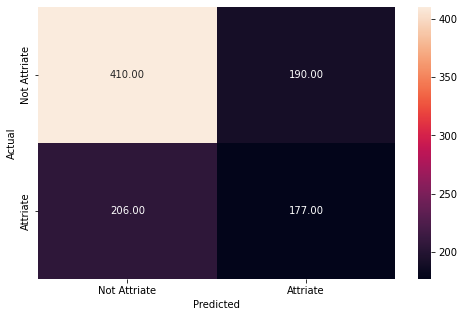

In [19]:
y_test_pred_dt=dt.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

In [20]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state=7, class_weight={0:0.3, 1:0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10,20), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25, 30, 35, 40, 45, 50 ,55]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=25)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=2, min_samples_leaf=20, random_state=7)

              precision    recall  f1-score   support

           0       0.79      0.06      0.12      1398
           1       0.40      0.97      0.57       895

    accuracy                           0.42      2293
   macro avg       0.59      0.52      0.34      2293
weighted avg       0.64      0.42      0.29      2293



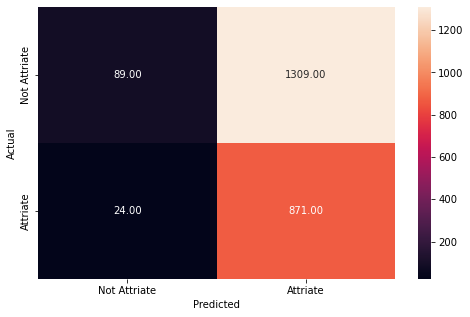

In [21]:
y_pred_train2=d_tree_tuned.predict(x_train)
metrics_score(y_train,y_pred_train2)

              precision    recall  f1-score   support

           0       0.68      0.05      0.09       600
           1       0.39      0.96      0.56       383

    accuracy                           0.41       983
   macro avg       0.54      0.51      0.33       983
weighted avg       0.57      0.41      0.27       983



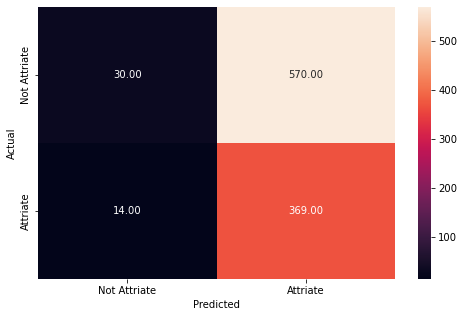

In [22]:
y_pred_test2 = d_tree_tuned.predict(x_test)
metrics_score(y_test,y_pred_test2)

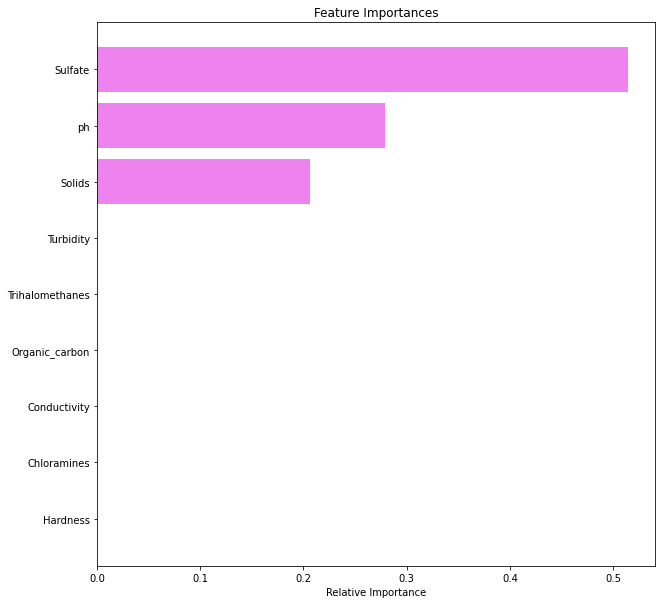

In [42]:
#Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

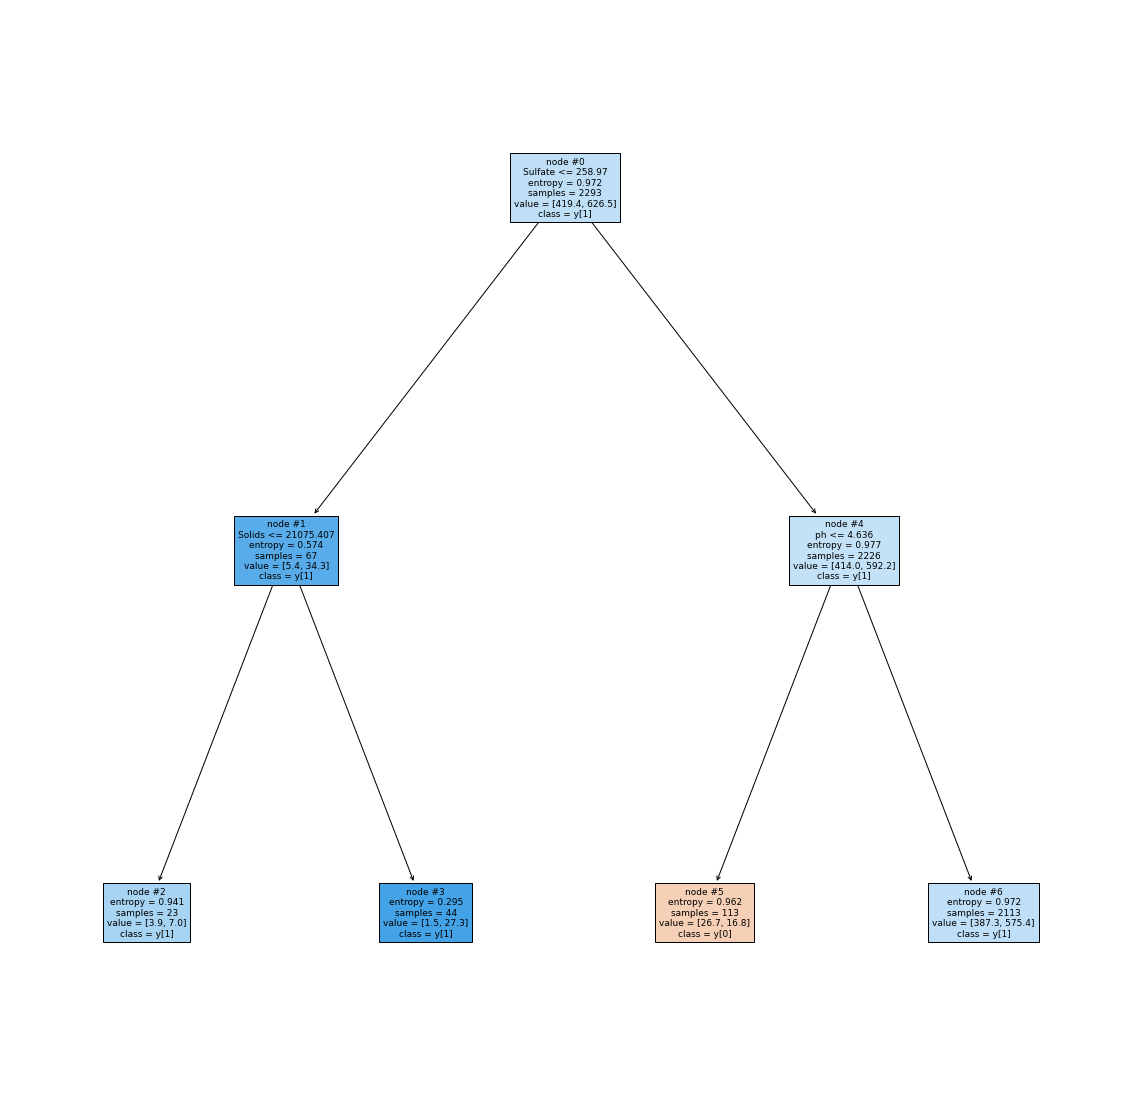

In [24]:
features = list(X.columns)

plt.figure(figsize=(20,20))

tree.plot_tree(d_tree_tuned,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [26]:
rf_estimator = RandomForestClassifier(random_state=1)

rf_estimator.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1398
           1       1.00      1.00      1.00       895

    accuracy                           1.00      2293
   macro avg       1.00      1.00      1.00      2293
weighted avg       1.00      1.00      1.00      2293



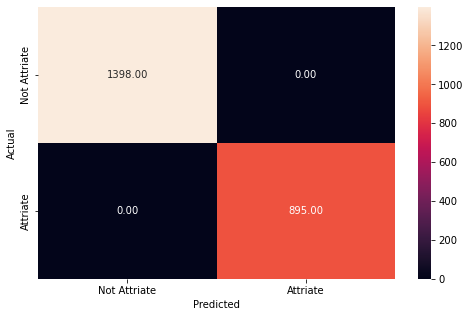

In [28]:
y_pred_train_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.67      0.87      0.76       600
           1       0.63      0.34      0.44       383

    accuracy                           0.67       983
   macro avg       0.65      0.61      0.60       983
weighted avg       0.66      0.67      0.64       983



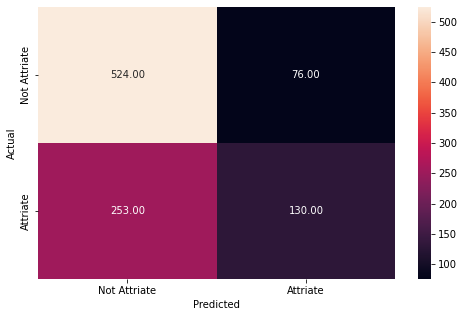

In [29]:
y_pred_test_rf = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

In [31]:
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [33]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.9,
                       n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1398
           1       0.96      0.35      0.51       895

    accuracy                           0.74      2293
   macro avg       0.83      0.67      0.67      2293
weighted avg       0.80      0.74      0.70      2293



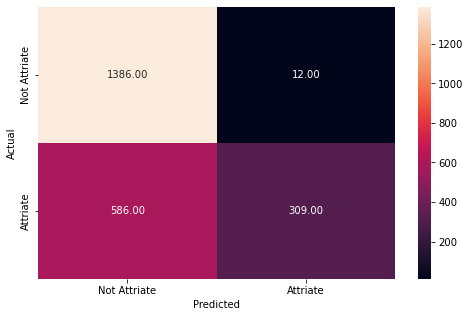

In [34]:
y_pred_train4 = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train4)

In [36]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": [{0:0.7, 1:0.3}, "balanced", {0:0.4, 1:0.1}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1398
           1       0.67      0.64      0.66       895

    accuracy                           0.74      2293
   macro avg       0.72      0.72      0.72      2293
weighted avg       0.74      0.74      0.74      2293



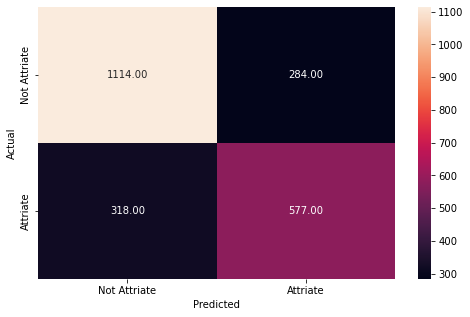

In [38]:
#Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train5)

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       600
           1       0.52      0.51      0.52       383

    accuracy                           0.63       983
   macro avg       0.61      0.61      0.61       983
weighted avg       0.63      0.63      0.63       983



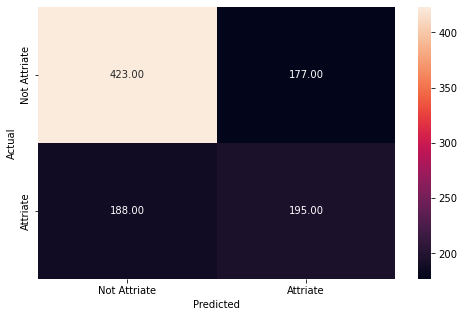

In [40]:
#Checking performance on the testing data
y_pred_test6 = rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test6)

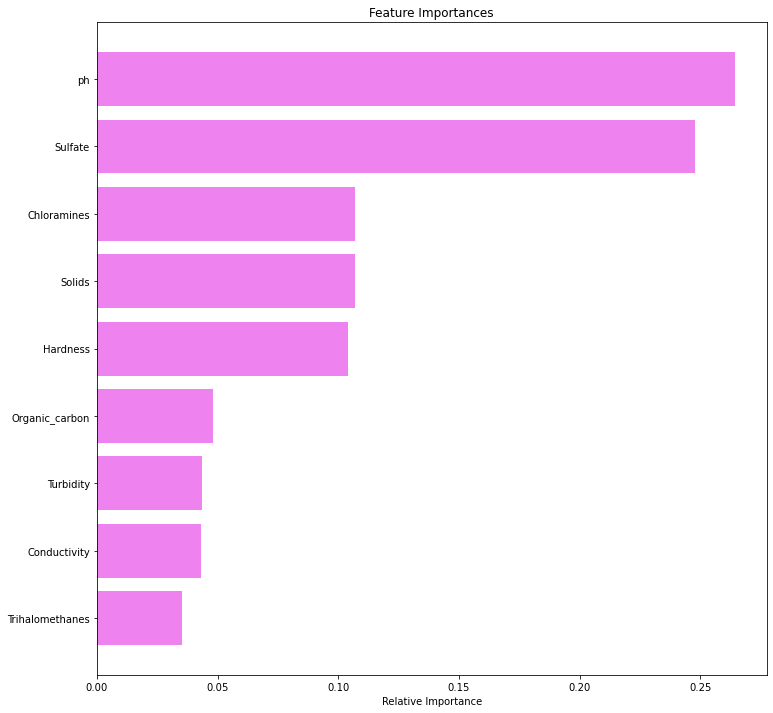

In [41]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()